# Intro to Machine Learning on Coursera

Based on the [Machine Learning Specialization course by Andrew Ng](https://www.coursera.org/specializations/machine-learning-introduction)

In [1]:
# Imports
import random
from sympy import symbols, diff, lambdify
import numpy as np
import numpy.typing as npt
import matplotlib.pyplot as plt
#from sklearn import *

## Supervised Machine Learning: Regression and Classification

### Polynomial Regression

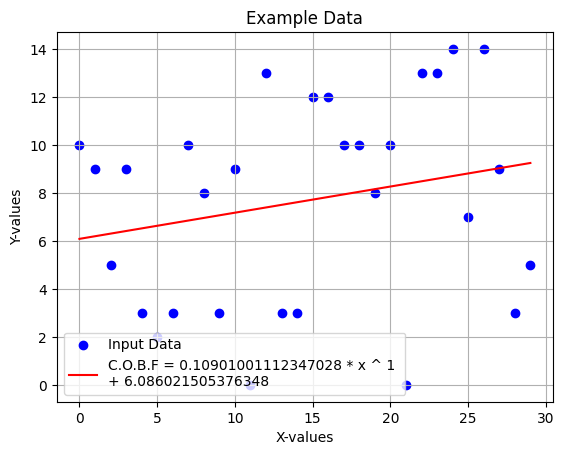

In [10]:
# Polynomial regression
polyDeg = 1

# Training data
xArr:npt.NDArray[np.int64] = np.array([x for x in range(0, 30)])
yArr:npt.NDArray[np.int64] = np.array([random.randint(0, 15) for y in range(0, 30)])
predWeights:npt.NDArray[np.float64] = np.polyfit(xArr, yArr, polyDeg) # Line of best fit weights
bestFitCurve:npt.NDArray[np.floating] = np.polyval(predWeights, xArr)

# Format polynomial function strings
def extrapolatePolynomials():
    functionString:str = ""
    displayString:str = ""
    # Generate strings
    for index in range(len(predWeights)):
        currDeg:int = len(predWeights) - index - 1
        functionString += f"{predWeights[index]}" 
        displayString += f"{predWeights[index]}"
        if currDeg > 0:
            functionString += f" * x ** + {currDeg} + "
            displayString += f" * x ^ {currDeg} \n+ "
    
    #Generate executable polynomial function from functionString
    executablePolynomial:function = lambdify(["x"], functionString)
    return (executablePolynomial, displayString)

#Store function and configured string for later
bestFitPoly, cobfStr = extrapolatePolynomials()

# Plot
plt.figure()
plt.scatter(xArr, yArr, color="blue", label="Input Data")
plt.plot(xArr, bestFitCurve, color="red", label=f"C.O.B.F = {cobfStr}")
plt.xlabel("X-values")
plt.ylabel("Y-values")
plt.title("Example Data")
plt.legend()
plt.grid(True)
plt.show()

### Gradient Descent

In [12]:
# Gradient descent on a known cost function
# Cost function, f(x)
def cost_func(x:float):
    return bestFitPoly(x) # calculated earlier from COBF
# Gradient of the cost function, f'(x)
def gradient(x:float):
    a = symbols('x')
    f_prime = diff(cost_func(a), a)
    derivative:function = lambdify(["x"], f_prime)
    return derivative(x)

# Gradient Descent parameters
learnRate:float = 2**(-8) # Step size 1/(2^8)
iterations:int = 10_000 # Number of iterations
xGuess:float = 0.0 # Initial guess for x (starting point)

# Gradient Descent optimization
for i in range(iterations):
    # Compute the gradient at the current point
    grad = gradient(xGuess)
    
    # Update x using the Gradient Descent formula
    xGuess = xGuess - learnRate * grad

# The value of x after optimization represents the minimum of the cost function
minimum_x:float = xGuess
minimum_cost:float = cost_func(minimum_x)

# Print the result
print(f"Minimum value of x: {minimum_x}")
print(f"Minimum cost: {minimum_cost}")

Minimum value of x: -4.2582035595106715
Minimum cost: 5.6218346879880885


### TBD

## Advanced Learning Algorithms

### TBD

## Unsupervised Learning, Recommenders, Reinforcement Learning

### TBD